In [2]:
import pyBigWig
import bioframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cooler
import cooltools
import cooltools.expected
from cooltools import snipping

import cooltools.lib.plotting
import multiprocess

from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
from scipy import stats

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [3]:
jets = bioframe.read_table('/home/kimj50/cohesin_paper/jets_call/jetcall_v5_w30kb.bed',schema='bed6')
jets['chrom']='chr'+jets.chrom
jets['mid']=jets.start+1000
jets

,chrom,start,end,name,score,strand,mid
0,chrI,40000,42000,0.873599,NaN,NaN,41000
1,chrI,398000,400000,0.478021,NaN,NaN,399000
2,chrI,436000,438000,0.757617,NaN,NaN,437000
3,chrI,882000,884000,0.721457,NaN,NaN,883000
4,chrI,996000,998000,0.579993,NaN,NaN,997000
...,...,...,...,...,...,...,...
282,chrX,15608000,15610000,0.354994,NaN,NaN,15609000
283,chrX,16612000,16614000,0.606702,NaN,NaN,16613000
284,chrX,16732000,16734000,0.349982,NaN,NaN,16733000
285,chrX,17516000,17518000,0.806431,NaN,NaN,17517000


In [4]:
bw_smc1_ca1200 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC1_CA1200_1hrauxin_inputsubt_avg.bw")
bw_smc1_jk05 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC1_JK05_1hrauxin_inputsubt_avg.bw")
bw_smc1_jk06 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC1_JK06_1hrauxin_inputsubt_avg.bw")

bw_smc3_ca1200 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC3_CA1200_1hrauxin_inputsubt_avg.bw")
bw_smc3_jk05 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC3_JK05_1hrauxin_inputsubt_avg.bw")
bw_smc3_jk06 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin/chip_processed/SMC3_JK06_1hrauxin_inputsubt_avg.bw")

bw_nipbl_ca1200 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_CA1200_1hrauxin_inputsubt_avg.bw")
bw_nipbl_jk05 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin_2/chip_processed/PQN85_JK05_1hrauxin_inputsubt_avg.bw")
bw_nipbl_jk06 = pyBigWig.open("/scratch/cgsb/ercan/GEO/GEO_cohesin_3/ChIP-seq/PQN85_JK06_1hrauxin_inputsubt_avg.bw")

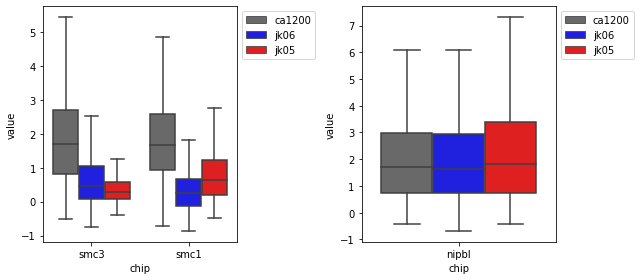

In [7]:
############################ average plots on fountain #################################
flank = 3_000
smc1_ca1200 = []
smc1_jk05 = []
smc1_jk06 = []

bws = [bw_smc1_ca1200,bw_smc1_jk05,bw_smc1_jk06]

bws1_vals = []
for b in range(len(bws)):
    bw_vals = []
    for i in range(len(jets)):
        v = bws[b].stats(jets.chrom[i],jets.mid[i]-flank,jets.mid[i]+flank,type='mean')[0]
        bw_vals.append(v)
    bws1_vals.append(np.array(bw_vals))

bws = [bw_smc3_ca1200,bw_smc3_jk05,bw_smc3_jk06]
bws2_vals = []
for b in range(len(bws)):
    bw_vals = []
    for i in range(len(jets)):
        v = bws[b].stats(jets.chrom[i],jets.mid[i]-flank,jets.mid[i]+flank,type='mean')[0]
        bw_vals.append(v)
    bws2_vals.append(np.array(bw_vals))




d = {'ca1200':bws1_vals[0],
     'jk05':bws1_vals[1],
     'jk06':bws1_vals[2]}

smc1_vals = pd.DataFrame(d)

d = {'ca1200':bws2_vals[0],
     'jk05':bws2_vals[1],
     'jk06':bws2_vals[2]}

smc3_vals = pd.DataFrame(d)

############################ average plots on fountain #################################
smc1_ca1200 = []
smc1_jk05 = []
smc1_jk06 = []

bws = [bw_nipbl_ca1200,bw_nipbl_jk05,bw_nipbl_jk06]

bws1_vals = []
for b in range(len(bws)):
    bw_vals = []
    for i in range(len(jets)):
        v = bws[b].stats(jets.chrom[i],jets.mid[i]-flank,jets.mid[i]+flank,type='mean')[0]
        bw_vals.append(v)
    bws1_vals.append(np.array(bw_vals))





d = {'ca1200':bws1_vals[0],
     'jk05':bws1_vals[1],
     'jk06':bws1_vals[2]}

nipbl_vals = pd.DataFrame(d)

##########################################

smc1_vals_m = pd.melt(smc1_vals)
smc1_vals_m['chip'] = 'smc1'
smc3_vals_m = pd.melt(smc3_vals)
smc3_vals_m['chip'] = 'smc3'

dat = pd.concat([smc1_vals_m,smc3_vals_m]).reset_index(drop=True)


dat2 = pd.melt(nipbl_vals)
#sns.boxplot(data=dat,x='variable',y='value',hue='chip',showfliers=False)

dat2['chip']='nipbl'


#########################################
f, axs = plt.subplots(
    figsize=(9, 4),
    nrows=1,
    ncols=2,

)

order = ['smc3','smc1']
hue_order = ['ca1200', 'jk06', 'jk05']


sns.boxplot(ax=axs[0],data=dat,x='chip',y='value',hue='variable',showfliers=False,palette=['dimgray','blue','red'],hue_order=hue_order,order=order)
sns.boxplot(ax=axs[1],data=dat2,x='chip',y='value',hue='variable',showfliers=False,palette=['dimgray','blue','red'],hue_order=hue_order,)
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()



(-1.103830684010188, 7.786667591436704)

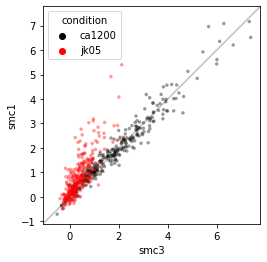

In [12]:
################## average plots ###################

f, axs = plt.subplots(
    figsize=(4, 4),
    nrows=1,
    ncols=1,
#    sharex='row',
#    sharey='row'
)

Alpha = 0.4
Size = 12
ax=axs

x1,y1 = np.array(smc1_vals.ca1200,dtype='float'),np.array(smc3_vals.ca1200,dtype='float')
x2,y2 = np.array(smc1_vals.jk05,dtype='float'),np.array(smc3_vals.jk05,dtype='float')

ctr_df = {'smc1':x1, 'smc3':y1, 'condition':['ca1200']*len(x1)}
jk05_df = {'smc1':x2, 'smc3':y2, 'condition':['jk05']*len(x2)}
df = pd.concat([pd.DataFrame(ctr_df),pd.DataFrame(jk05_df)])

sns.scatterplot(ax=ax,data=df, x="smc3", y="smc1", hue="condition",alpha=Alpha,s=Size,palette=['black','red'],linewidth=0)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims,alpha=0.5, zorder=0, color='grey',label='y=x')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

